<a href="https://colab.research.google.com/github/beyzassevval/beyzassevval/blob/main/student_stress_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path=kagglehub.dataset_download('mdsultanulislamovi/student-stress-monitoring-datasets')
print("Path to dataset files",path)


Path to dataset files /kaggle/input/student-stress-monitoring-datasets


In [ ]:
import pandas as pd
import os

dosyayolu=os.path.join(path,'StressLevelDataset.csv')
df=pd.read_csv(dosyayolu)
print(df.head())
print(df.shape)
#toplam 21 kolon var

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [ ]:
np.random.seed(42)
n_samples = 1100
df = pd.DataFrame({
    'anxiety_level': np.random.randint(5, 25, n_samples),
    'self_esteem': np.random.randint(0, 30, n_samples),
    'mental_health_history': np.random.randint(0, 2, n_samples),
    'depression': np.random.randint(3, 20, n_samples),
    'headache': np.random.randint(0, 6, n_samples),
    'blood_pressure': np.random.randint(1, 4, n_samples),
    'sleep_quality': np.random.randint(0, 6, n_samples),
    'breathing_problem': np.random.randint(0, 5, n_samples),
    'noise_level': np.random.randint(0, 5, n_samples),
    'living_conditions': np.random.randint(0, 4, n_samples),
    'safety': np.random.randint(1, 5, n_samples),
    'basic_needs': np.random.randint(1, 5, n_samples),
    'academic_performance': np.random.randint(0, 6, n_samples),
    'study_load': np.random.randint(1, 6, n_samples),
    'teacher_student_relationship': np.random.randint(1, 5, n_samples),
    'future_career_concerns': np.random.randint(1, 6, n_samples),
    'social_support': np.random.randint(1, 4, n_samples),
    'peer_pressure': np.random.randint(1, 6, n_samples),
    'extracurricular_activities': np.random.randint(0, 6, n_samples),
    'bullying': np.random.randint(0, 6, n_samples),
    'stress_level': np.random.randint(0, 3, n_samples)  # 0, 1, 2 stress levels
})

print("Veri yüklendi!")
print("Veri şekli:", df.shape)
print(df.head())

Veri yüklendi!
Veri şekli: (1100, 21)
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             11            4                      0           4         4   
1             24            4                      1          13         3   
2             19            5                      1          11         0   
3             15           29                      1           9         2   
4             12            8                      1          19         1   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               3              0                  0            4   
1               2              2                  4            3   
2               2              5                  2            3   
3               3              0                  0            3   
4               1              5                  3            1   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
# X ve Y satır - sütun olarak ayrıldı
YSample=df.iloc[:,20]
XSample=df.iloc[:,0:20]

print(XSample)
print(YSample)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XSample, YSample, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
# Train test validation olarak veriyi ayırdım
#2 ve 3.satırda tanımlarken önce x ler sonra y ler sırayla tanımlanmalı

(880, 20)
(880,)
(176, 20)
(176,)
(44, 20)
(44,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [ ]:
print(y_train)
#zaten label-encoding li olarak gelmiş

507     1
551     1
290     0
2       1
6       0
       ..
466     2
121     2
1044    2
1095    1
860     1
Name: stress_level, Length: 880, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model=keras.Sequential({
    layers.Dense(128,activation='relu',input_shape=(20,)),
    layers.Dropout(0.2),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='softmax')
})
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5025 - loss: 2.2091 - val_accuracy: 0.8920 - val_loss: 0.5501
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8699 - loss: 0.5174 - val_accuracy: 0.8807 - val_loss: 0.3008
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8528 - loss: 0.3663 - val_accuracy: 0.8864 - val_loss: 0.2370
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8946 - loss: 0.2842 - val_accuracy: 0.9034 - val_loss: 0.2196
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8946 - loss: 0.2472 - val_accuracy: 0.8977 - val_loss: 0.2049
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8833 - loss: 0.2671 - val_accuracy: 0.9034 - val_loss: 0.1992
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8977 - loss: 0.2413 - val_accuracy: 0.8920 - val_loss: 0.2016
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8886 - loss: 0.2673 - val_accuracy: 0.8977 - val_loss: 0.2024


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,50),activation='relu',solver='adam',alpha=0.00001,max_iter=100,random_state=42)

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val))
# activation relu iken accuracy 0.90 || softmax olduğunda 0.9446 oldu en yüksek score

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9080 - loss: 0.2151 - val_accuracy: 0.9034 - val_loss: 0.2100
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9167 - loss: 0.2072 - val_accuracy: 0.8920 - val_loss: 0.2004
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9009 - loss: 0.2166 - val_accuracy: 0.9034 - val_loss: 0.1967
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.1809 - val_accuracy: 0.8920 - val_loss: 0.1971
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9075 - loss: 0.1795 - val_accuracy: 0.9034 - val_loss: 0.1871
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9147 - loss: 0.1887 - val_accuracy: 0.9091 - val_loss: 0.1865
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9146 - loss: 0.1898 - val_accuracy: 0.9034 - val_loss: 0.1882
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9145 - loss: 0.2093 - val_accuracy: 0.8864 - val_loss:

In [ ]:

# Test seti üzerinde tahmin
test_predictions = model.predict(x_test)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Accuracy hesaplama
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Test Accuracy: 0.8182
Test Loss: 0.3021


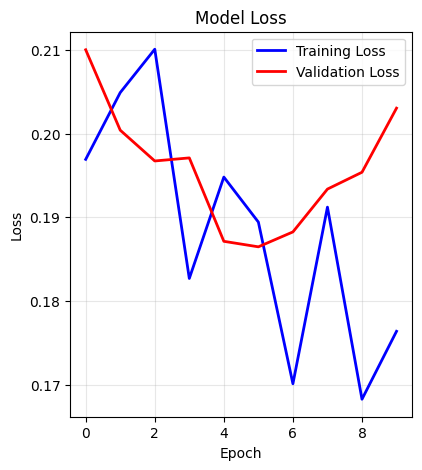

In [ ]:
plt.figure(figsize=(15, 5))

# Loss grafiği
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True, alpha=0.3)

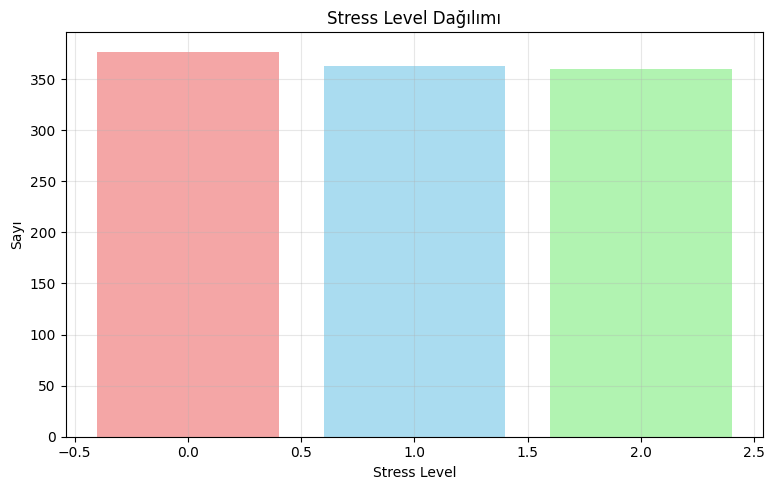

In [ ]:
# Stress Level Dağılımı
plt.figure(figsize=(15, 5))
plt.subplot(1,2,2)
stress_counts = df['stress_level'].value_counts().sort_index()
colors = ['lightcoral', 'skyblue', 'lightgreen']
plt.bar(stress_counts.index, stress_counts.values, color=colors[:len(stress_counts)], alpha=0.7)
plt.xlabel('Stress Level')
plt.ylabel('Sayı')
plt.title('Stress Level Dağılımı')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

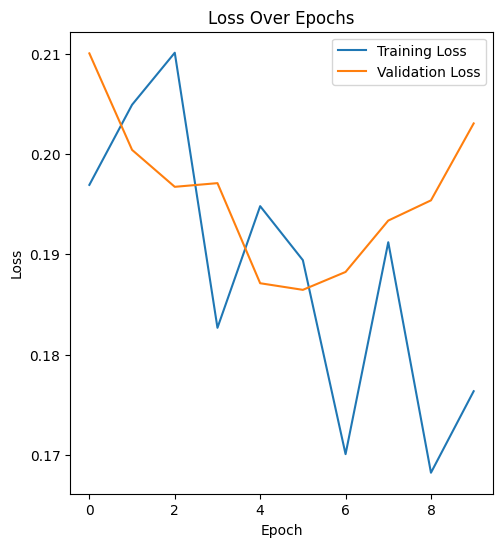

In [ ]:
plt.figure(figsize=(12, 6))

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()